<a href="https://colab.research.google.com/github/Shin-Sangseok/Google_colab_practice/blob/main/ml%EC%A0%84%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ml 전과정 정리

In [ ]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#이거 임포트 해줘야 차트에서 오류안남. 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
#font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
#font_name = fm.FontProperties(fname=font_location).get_name()
#rc('font', family=font_name)

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
type(mnist)

sklearn.utils.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
mnist['feature_names'][:5]

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5']

In [ ]:
mnist2 = data.load_digits()
mnist2.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
type(mnist['data'])

pandas.core.frame.DataFrame

In [ ]:
# mnist['data'].to_csv('mnist.csv', encoding='utf-8')

In [ ]:
mnist_df = mnist['data']
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist_df.shape

(70000, 784)

In [ ]:
target = mnist['target']
len(target)

70000

In [ ]:
target[:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
# X : "문제 데이터"를 대문자로 많이 씀!
# y : "정답 데이터"를 소문자로 많이 씀!
X_train, X_test, y_train, y_test = mnist_df[:60000], mnist_df[60000:], target[:60000], target[60000:]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# SGD: 확률적으로 제일 가능성이 높은 선을 구분선으로 정하는 방법

In [ ]:
# 모델을 선정했으면, 객체를 생성하자.
sgd_clf = SGDClassifier()

In [ ]:
# 1. 훈련데이터로 공부시키자!
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [ ]:
sgd_acc1 = sgd_clf.score(X_train, y_train)  #훈련데이터 점수
sgd_acc1

0.8999

In [ ]:
# 2. 검증데이터로 검증해보자!
result = sgd_clf.predict(X_test)

In [ ]:
# 3. 답지와 정답을 비교해서 점수를 확인해보자.!(채점!)
from sklearn.metrics import accuracy_score

accuracy_jumsu = accuracy_score(y_test, result)
accuracy_jumsu #검증용 데이터 점수
# --------- ml끝! ---------

0.8916

In [ ]:
# 4. 실제데이터로 판별해보자!

In [ ]:
# accuracy 
# 훈련용 데이터 점수 , 검증용 데이터 점수 비교해보아야 함.
# 훈련용 점수 == 검증용 점수, 일반화하기 괜찮음.
# 훈련용 점수 > 검증용 점수, 훈련용 문제에 최적화되어, 다른 문제를 못푸는 경우, 모델로 부적합
# 훈련용 점수 < 검증용 점수, 다양한 문제 유형을 풀 수 있는 모델이기 때문에 모델로 적합
# 한 set의 데이타로 일반화하면 안된다. 여러 데이터를 넣었을 때 유사한 결과가 나와야 일반적으로
# 사용할 수 있는 모델로 채택

In [ ]:
## 훈련데이터와 검증용 데이터를 임의의 비율로 선별하여 다시 fit하여 정확도를 비교해보세요.!

In [ ]:
mnist_df[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df1 = mnist_df[:10000]
train_df2 = mnist_df[20000:30000]
train_df3 = mnist_df[40000:]

In [ ]:
train_df = train_df1.append(train_df2, ignore_index=True)
train_df.shape

(20000, 784)

In [ ]:
train_df = train_df.append(train_df3, ignore_index=True)
train_df.shape

(50000, 784)

In [ ]:
train_df1_target = target[:10000]
train_df2_target = target[20000:30000]
train_df3_target = target[40000:]

In [ ]:
train_df_target = []

In [ ]:
train_df_target.extend(train_df1_target)

In [ ]:
train_df_target.extend(train_df2_target)
train_df_target.extend(train_df3_target)

In [ ]:
len(train_df_target)

50000

In [ ]:
test_df1 = mnist_df[10000:20000]
test_df2 = mnist_df[30000:40000]

In [ ]:
test_df = test_df1.append(test_df2, ignore_index=True)
test_df.shape

(20000, 784)

In [ ]:
test_df_target = []

In [ ]:
test_df1_target = target[10000:20000]
test_df2_target = target[30000:40000]

In [ ]:
test_df_target.extend(test_df1_target)
test_df_target.extend(test_df2_target)

In [ ]:
len(test_df_target)

20000

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.0.2'

In [ ]:
## the end

In [ ]:
# 1. 훈련데이터로 공부시키자!
sgd_clf.fit(train_df, train_df_target)

SGDClassifier()

In [ ]:
sgd_acc2 = sgd_clf.score(train_df, train_df_target)
sgd_acc2

0.85216

In [ ]:
result2 = sgd_clf.predict(test_df)

In [ ]:
accuracy_jumsu2 = accuracy_score(test_df_target, result2)
accuracy_jumsu2 #검증용 데이터 점수

0.8272

In [ ]:
## Decsion Tree 비교해보세요.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## max_depth : 5, 10, 15
tree_clf = DecisionTreeClassifier(
                max_depth=15, random_state=42
)

In [ ]:
train_exam, test_exam, train_target, test_target = train_test_split(
                        mnist['data'],  #문제(df)
                        target, #정답(ndarray, Series, list 1차원 데이터!)
                        test_size=0.2, #검증비율 20%, 훈련비율 80%
                        #target의 비율을 골고루 맞추어 주는 역할!
#                         stratify=True,
                        random_state=100 #seed
                )

In [ ]:
train_exam.shape

(56000, 784)

In [ ]:
test_exam.shape

(14000, 784)

In [ ]:
train_target.shape

(56000,)

In [ ]:
test_target.shape

(14000,)

In [ ]:
type(test_target)

pandas.core.series.Series

In [ ]:
tree_clf.fit(train_exam, train_target)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [ ]:
tree_clf.score(train_exam, train_target)

0.9819821428571428

In [ ]:
####### max_depth 찾아보기 ###########

In [ ]:
## max_depth : 5, 10, 15
train_acc = []
test_acc = []
for md in [5, 10, 15]:
    tree_clf = DecisionTreeClassifier(
                    max_depth=md, random_state=42
    )
    #train_exam, test_exam, train_target, test_target
    tree_clf.fit(train_exam, train_target) # 훈련데이터를 가지고 공부
    score = tree_clf.score(train_exam, train_target)  #훈련데이터 점수
    train_acc.append(score) #훈련데이터 점수 누적
    
    result2 = tree_clf.predict(test_exam) #검증용 데이터 테스트를 봄
    acc = accuracy_score(test_target, result2)  #검증데이터 점수
    test_acc.append(acc) #검증데이터 점수 누적

In [ ]:
print('train_acc>> ', train_acc)
print('test_acc>> ', test_acc)

train_acc>>  [0.6828571428571428, 0.8996428571428572, 0.9819821428571428]
test_acc>>  [0.6909285714285714, 0.859, 0.8767142857142857]


In [ ]:
train_acc2 = []
test_acc2 = []
for md in [8, 10, 12]:
    tree_clf = DecisionTreeClassifier(
                    max_depth=md, random_state=42
    )
    #train_exam, test_exam, train_target, test_target
    tree_clf.fit(train_exam, train_target) # 훈련데이터를 가지고 공부
    score = tree_clf.score(train_exam, train_target)  #훈련데이터 점수
    train_acc2.append(score) #훈련데이터 점수 누적
    
    result2 = tree_clf.predict(test_exam) #검증용 데이터 테스트를 봄
    acc = accuracy_score(test_target, result2)  #검증데이터 점수
    test_acc2.append(acc) #검증데이터 점수 누적

In [ ]:
print('train_acc2>> ', train_acc2)
print('test_acc2>> ', test_acc2)

train_acc2>>  [0.8355, 0.8996428571428572, 0.9477321428571429]
test_acc2>>  [0.8262857142857143, 0.859, 0.8732857142857143]


In [ ]:
index = ['sgd-1', 'sgd-2', 'dt-5', 'dt-10', 'dt-15']
train_acc = [sgd_acc1, sgd_acc2, train_acc[0], train_acc[1], train_acc[2]]
test_acc = [accuracy_jumsu, accuracy_jumsu2, test_acc[0], test_acc[1], test_acc[2] ]

In [ ]:
plt_df = pd.DataFrame({'index' : index, 
                                      'train_acc' : train_acc,
                                       'test_acc' : test_acc
                      })

In [ ]:
plt_df.reset_index()

,level_0,index,train_acc,test_acc
0,0,sgd-1,0.899900,0.891600
1,1,sgd-2,0.852160,0.827200
2,2,dt-5,0.682857,0.690929
3,3,dt-10,0.899643,0.859000
4,4,dt-15,0.981982,0.876714


In [ ]:
plt_df.set_index('index', inplace=True)

<Figure size 504x432 with 0 Axes>

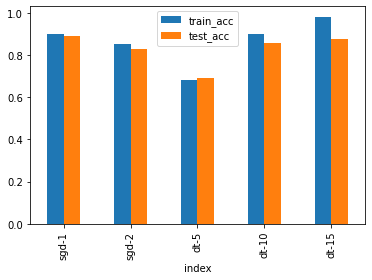

In [ ]:
plt.figure(figsize=(7, 6))
plt_df.plot(kind='bar')
plt.show()

In [ ]:
#from sklearn.metrics import roc_curve, auc
#from numpy import interp 
import matplotlib.pyplot as plt
import numpy as np 

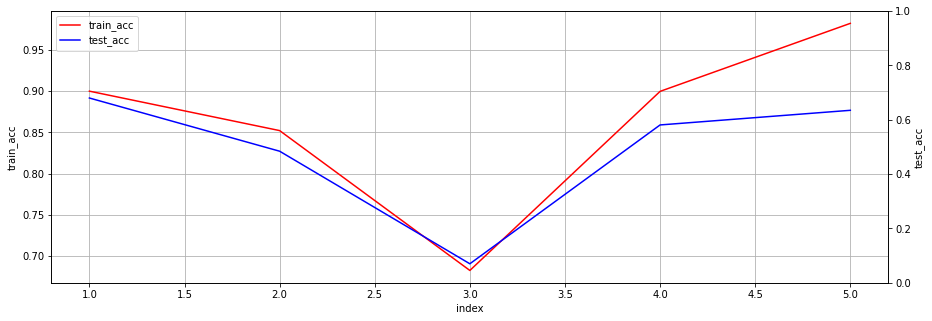

In [ ]:
fig, ax1 = plt.subplots(figsize = (15,5))

ax2 = ax1.twinx()
lns1 = ax1.plot([1,2,3,4,5],plt_df['train_acc'], label = 'train_acc', color = 'red')
lns2 = ax1.plot([1,2,3,4,5],plt_df['test_acc'], label = 'test_acc', color = 'blue')
lns = lns1+ lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs, loc=0)


ax1.grid()
ax1.set_xlabel('index')
ax1.set_ylabel('train_acc')
ax2.set_ylabel('test_acc')
plt.show()


